# 모델 평가
모델의 성능을 평가한다. 평가결과에 따라 프로세스를 다시 반복한다.
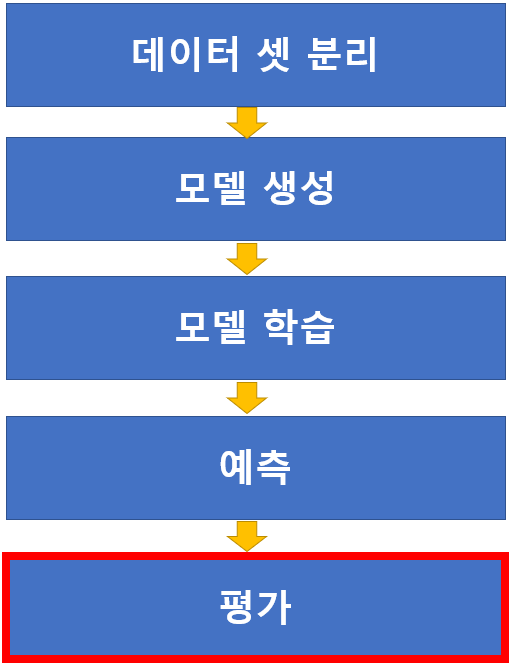

# 분류와 회귀의 평가방법

### 분류 평가 지표
1. 정확도 (Accuracy)
1. 정밀도 (Precision)
1. 재현률 (Recall)
1. F1점수 (F1 Score)
1. PR Curve, AP score
1. ROC, AUC score

### 회귀 평가방법
1. MSE (Mean Squared Error)
1. RMSE (Root Mean Squared Error)
1. $R^2$ (결정계수)

### sckit-learn 평가함수 모듈
- sklearn.metrics 모듈을 통해 제공

# 분류(Classification) 평가 지표

## 다중 분류(Multi class classification)
- Target이 여러개의 클래스(범주값)으로 구성된 분류문제
    - 여러개의 클래스중 하나를 분류한다.
    
##  이진 분류(Binary classification)
- 어떤 항목인지 아닌지를 분류한다.
    - 환자인가?
    - 스팸메일인가? 
    - 사기 거래 인가?
- 이진 분류 양성(Positive)과 음성(Negative)
    - **양성(Positive):** 찾으려는 대상. 보통 1로 표현한다.
    - **음성(Negative):** 찾으려는 대상이 아닌 것. 보통 0로 표현한다.
- 예
    - 환자인가?
        - 양성(Positive): 환자, 1
        - 음성(Negative): 환자 아님(정상), 0
    - 스팸메일인가? 
         - 양성(Positive): 스팸메일, 1
         - 음성(Negative): 스팸메일 아님(정상 메일), 0
    - 사기 거래 인가?
         - 양성(Positive): 사기 거래, 1
         - 음성(Negative): 사기 거래 아님(정상 거래), 0
        

## 정확도 (Accuracy)
- 대표적인 분류의 평가 지표


$$
\large{
정확도 (Accuracy) = \cfrac{맞게 예측한 건수} {전체 예측 건수}
}
$$

- 전체 예측 한 것중 맞게 예측한 비율로 평가한다.
- `accuracy_score(정답, 모델예측값)`

### Accuracy 평가지표의 문제
- 이진 분류에서 **양성(Positive)에 대한 지표만 확인 할 수 없다.** 
    - 전체 중 몇 개가 맞았는지에 대한 평가 지표이므로 양성(Positive)만의 성능 또는 음성(Negative)만의 성능을 알 수 없다.
- 불균형 데이터의 경우 정확한 평가지표가 될 수 없다.
    - 예: 양성과 음성의 비율이 1:9 인 경우 모두 음성이라고 하면 정확도는 90%가 된다.

## MNIST Data set
- 손글씨 숫자 데이터 셋
    - 미국 국립표준연구소(NIST) 에서 수집한 손글씨 숫자(0 ~ 9) 데이터셋을 수정한 이미지 데이터셋.
- 사이킷런 제공 image size: 8 X 8 
    - 원본 데이터는 28 X 28 크기로 train 60,000장, test 10,000 장을 제공한다.
- https://ko.wikipedia.org/wiki/MNIST_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B2%A0%EC%9D%B4%EC%8A%A4

### mnist 데이터 셋 로드 및 확인

In [56]:
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt
mnist= load_digits()
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [57]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(mnist.data)

In [58]:
scaled_data[0]

array([0.        , 0.        , 0.3125    , 0.8125    , 0.5625    ,
       0.0625    , 0.        , 0.        , 0.        , 0.        ,
       0.8125    , 0.9375    , 0.625     , 0.9375    , 0.3125    ,
       0.        , 0.        , 0.1875    , 0.9375    , 0.125     ,
       0.        , 0.6875    , 0.5       , 0.        , 0.        ,
       0.26666667, 0.75      , 0.        , 0.        , 0.5       ,
       0.53333333, 0.        , 0.        , 0.35714286, 0.5       ,
       0.        , 0.        , 0.5625    , 0.57142857, 0.        ,
       0.        , 0.25      , 0.6875    , 0.        , 0.0625    ,
       0.75      , 0.4375    , 0.        , 0.        , 0.125     ,
       0.875     , 0.3125    , 0.625     , 0.75      , 0.        ,
       0.        , 0.        , 0.        , 0.375     , 0.8125    ,
       0.625     , 0.        , 0.        , 0.        ])

In [59]:
X,y=mnist['data'],mnist['target'] # mnist.data , mnist.target

X.shape, y.shape 
# X: image => 8 X 8 2차원 배열을 flatten(1차원 으로  reshape)함
    

((1797, 64), (1797,))

In [60]:
np.unique(y,return_counts=True) # 각 값마다 값의 갯수 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180], dtype=int64))

In [61]:
mnist.feature_names

['pixel_0_0',
 'pixel_0_1',
 'pixel_0_2',
 'pixel_0_3',
 'pixel_0_4',
 'pixel_0_5',
 'pixel_0_6',
 'pixel_0_7',
 'pixel_1_0',
 'pixel_1_1',
 'pixel_1_2',
 'pixel_1_3',
 'pixel_1_4',
 'pixel_1_5',
 'pixel_1_6',
 'pixel_1_7',
 'pixel_2_0',
 'pixel_2_1',
 'pixel_2_2',
 'pixel_2_3',
 'pixel_2_4',
 'pixel_2_5',
 'pixel_2_6',
 'pixel_2_7',
 'pixel_3_0',
 'pixel_3_1',
 'pixel_3_2',
 'pixel_3_3',
 'pixel_3_4',
 'pixel_3_5',
 'pixel_3_6',
 'pixel_3_7',
 'pixel_4_0',
 'pixel_4_1',
 'pixel_4_2',
 'pixel_4_3',
 'pixel_4_4',
 'pixel_4_5',
 'pixel_4_6',
 'pixel_4_7',
 'pixel_5_0',
 'pixel_5_1',
 'pixel_5_2',
 'pixel_5_3',
 'pixel_5_4',
 'pixel_5_5',
 'pixel_5_6',
 'pixel_5_7',
 'pixel_6_0',
 'pixel_6_1',
 'pixel_6_2',
 'pixel_6_3',
 'pixel_6_4',
 'pixel_6_5',
 'pixel_6_6',
 'pixel_6_7',
 'pixel_7_0',
 'pixel_7_1',
 'pixel_7_2',
 'pixel_7_3',
 'pixel_7_4',
 'pixel_7_5',
 'pixel_7_6',
 'pixel_7_7']

In [62]:
X.min() , X.max()  # 최소 0, 최대 16 

(0.0, 16.0)

In [63]:
# X[0] 첫번째 사진 (64,) <- (8.8)

X[0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

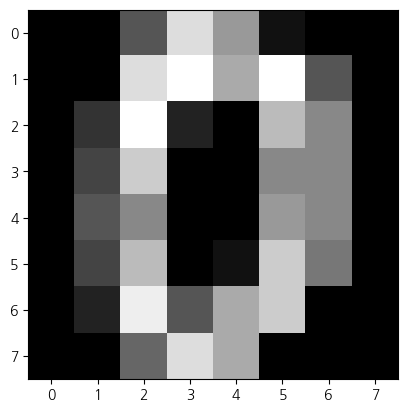

In [64]:
plot.imshow(X[0].reshape(8,8), cmap='gray')# cmap='gray') # 최소 흑색, 최대:백색

plot.show()

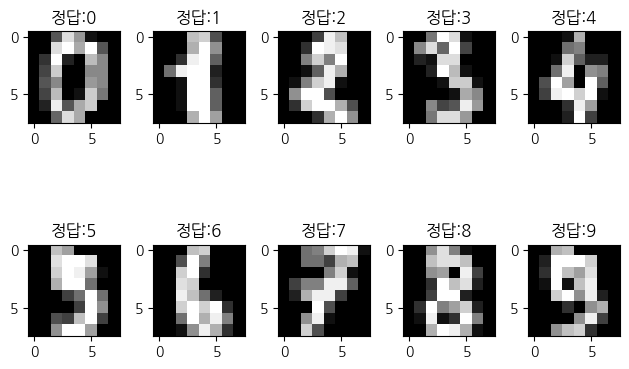

In [65]:
for i in range(10):
    plot.subplot(2,5,i+1)
    plot.imshow(X[i].reshape(8,8),cmap="gray")
    plot.title(f"정답:{y[i]}")

plot.tight_layout()
plot.show()

### 불균형 데이터셋으로 만들기
이미지를 0 ~ 9 로 분류하는 문제를 위한 데이터셋 ===> 9와 나머지 숫자로 분류하는 데이터셋으로 변환 => 이 숫자가 9야?
- y를 9와 나머지로 변경한다.
- Positive(양성 - 1): 9
- Negative(음성 - 0): 0 ~ 8

In [66]:
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [67]:
y=np.where(y==9,1,0)

In [68]:
# 9->1
# 0 ~ 8 ( 9가 아닌 것들은 ) -> 0
np.unique(y, return_counts=True)

(array([0, 1]), array([1617,  180], dtype=int64))

In [69]:
1617/1797, 180/1797 #  불균형 데이터셋

(0.8998330550918197, 0.1001669449081803)

### 데이터셋 분할
- train/test 로 분할

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y,test_size=0.25, random_state=0)

X_train.shape, X_test.shape

((1347, 64), (450, 64))

In [71]:
np.unique(y_train, return_counts=True)[1]/y_train.size

array([0.89977728, 0.10022272])

In [72]:
np.unique(y_test, return_counts=True)[1]/y_test.size

array([0.9, 0.1])

### 모델 생성 및 학습

#### Dummy Model 정의
- dummy model: 진짜 모델이 아니라 모델을 흉내낸 모델을 말한다.
- Target Label중 무조건 최빈값으로 예측하는 모델을 정의한다.

In [73]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

In [74]:
d_model = DummyClassifier(strategy='most_frequent') # y(정답)의 최빈값을 결과로 출력 
# dummy 모델 학습 
d_model.fit(X_train,y_train) # y의 최빈 값을 찾는다
# dummy모델 추론
pred_train = d_model.predict(X_train)  # y_train의 최빈값으로 추정
pred_test= d_model.predict(X_test)

In [75]:
np.unique(pred_train), np.unique(pred_test)

(array([0]), array([0]))

In [76]:
accuracy_score(y_train, pred_train), accuracy_score(y_test,pred_test)

(0.8997772828507795, 0.9)

아무 학습도 하지 않았고 단순히 다수 Label을 정답으로 예측 했는데 90% 정확도(accuracy)라는 괜찮은 성능이 나옴.  
그런데 이게 좋은 모델인가?    
비록 정확도는 90%(0.9) 이지만 10%(0.1)의 **9**는 아예 분류하지 못한다. 우리가 찾으려는 대상(positive)이 9일 경우 하나도 분류해 내지 못하는 모델이 된다.     
그래서 **불균형 레이블 데이터세트**의 평가지표로 정확도만 보면 안된다. 특히 Positive에 대한 예측이 중요한 경우에는 accuracy는 알맞은 평가 지표가 아니다.

In [93]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score, accuracy_score,precision_score, f1_score


In [78]:
result_cm1=confusion_matrix(y_train,pred_train)
result_cm1

array([[1212,    0],
       [ 135,    0]], dtype=int64)

In [79]:
result_cm2= confusion_matrix(y_test,pred_test)

In [80]:
result_cm2

array([[405,   0],
       [ 45,   0]], dtype=int64)

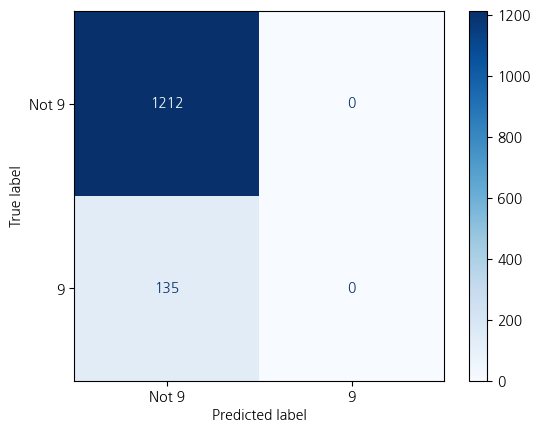

In [85]:
disp = ConfusionMatrixDisplay(result_cm1, # confusion_matrix 계산한 배열)
                            display_labels=['Not 9','9']) # 0,1 의 ticks 라벨을 변경
disp.plot(cmap='Blues')
plt.show()                        

In [ ]:
# plot_confision_matrix()   옛날 버전 

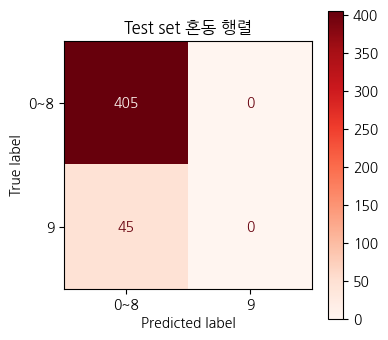

In [90]:
plt.figure(figsize=(4,4))
ax= plt.gca()
disp2= ConfusionMatrixDisplay(result_cm2, display_labels=["0~8",'9'])
disp2.plot(cmap='Reds',ax=ax)
plt.title("Test set 혼동 행렬")
plt.show()

## 혼동 행렬(Confusion Marix)
- 실제 값(정답)과 예측 한 것을 표로 만든 평가표
    - 분류의 예측 결과가 몇개나 맞고 틀렸는지를 확인할 때 사용한다.
- 함수: confusion_matrix(정답, 모델예측값)
- 결과의 0번축: 실제 class, 1번 축: 예측 class

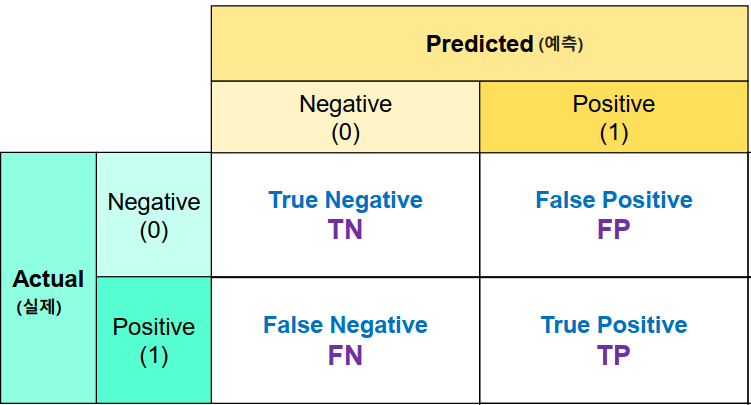

- **TP(True Positive)** 
    - 양성으로 예측했는데 맞은 개수
- **TN(True Negative)** 
    - 음성으로 예측했는데 맞은 개수
- **FP(False Positive)** 
    - 양성으로 예측했는데 틀린 개수 
    - 음성을 양성으로 예측
- **FN(False Negative)** 
    - 음성으로 예측했는데 틀린 개수 
    - 양성을 음성으로 예측

- 예)
```python
[[20, 6],
 [4,  40]]
```

## 이진 분류 평가지표

- **Accuracy (정확도)** 
    - 전체 데이터 중에 맞게 예측한 것의 비율
    - Accuracy(정확도)는 이진분류 뿐아니라 모든 분류의 기본 평가방식이다.
    
### 양성(Positive) 예측력 측정 평가지표

- **Recall/Sensitivity(재현율/민감도)** 
    - 실제 Positive(양성)인 것 중에 Positive(양성)로 예측 한 것의 비율
    - **TPR**(True Positive Rate) 이라고도 한다.
    - ex) 스팸 메일 중 스팸메일로 예측한 비율. 금융사기 데이터 중 사기로 예측한 비율
- **Precision(정밀도)**
    - Positive(양성)으로 예측 한 것 중 실제 Positive(양성)인 비율
    - **PPV**(Positive Predictive Value) 라고도 한다.
    - ex) 스팸메일로 예측한 것 중 스팸메일의 비율. 금융 사기로 예측한 것 중 금융사기인 것의 비율

- **F1 점수**
    - 정밀도와 재현율의 조화평균 점수
    - recall과 precision이 비슷할 수록 높은 값을 가지게 된다. F1 score가 높다는 것은 recall과 precision이 한쪽으로 치우쳐저 있이 않고 둘다 좋다고 판단할 수 있는 근거가 된다.

### 음성(Negative) 예측력 측정 평가지표
- **Specificity(특이도)**
    - 실제 Negative(음성)인 것들 중 Negative(음성)으로 맞게 예측 한 것의 비율
    - **TNR**(True Negative Rate) 라고도 한다.
- **Fall out(위양성률)**
    - 실제 Negative(음성)인 것들 중 Positive(양성)으로 잘못 예측한 것의 비율. `1 - 특이도`
    - **FPR** (False Positive Rate) 라고도 한다.
    - $Fall Out(FPR) = \cfrac{FP}{TN+FP}$

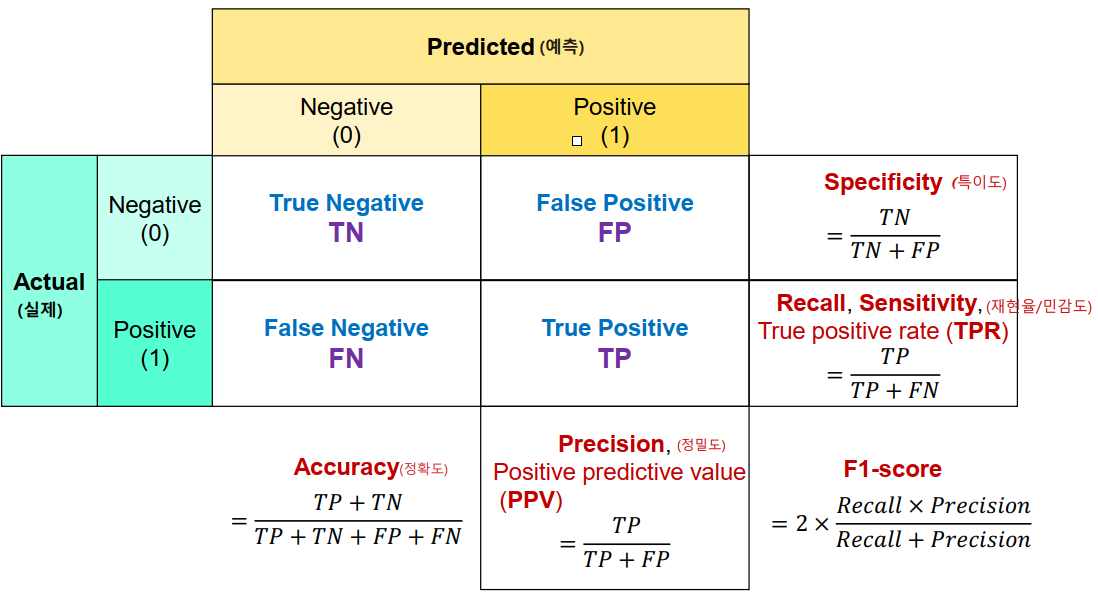

## 각 평가 지표 계산 함수
- sklearn.metrics 모듈
- **confusion_matrix(y 실제값, y 예측값),  ConfusionMatrixDisplay(Confusion marix 시각화클래스)**
    - 혼돈 행렬 반환
- **recall_score(y 실제값, y 예측값)**
  - Recall(재현율) 점수 반환 (Positive 중 Positive로 예측한 비율 (TPR))
- **precision_score(y 실제값, y 예측값)**
  - Precision(정밀도) 점수 반환 (Positive로 예측한 것 중 Positive인 것의 비율 (PPV))
- **f1_score(y 실제값, y 예측값)**
    - F1 점수 반환 (recall과 precision의 조화 평균값)
- **classification_report(y 실제값, y 예측값)**
    - 클래스 별로 recall, precision, f1 점수와 accuracy를 종합해서 보여준다.

###   Dummy 모델 혼동행렬

### dummy 모델 Accuracy, Recall, Precision, F1-Score

In [91]:
print("Accuracy")
accuracy_score(y_train, pred_train), accuracy_score(y_test, pred_test)

Accuracy


(0.8997772828507795, 0.9)

In [94]:
print("Recall")
recall_score(y_train, pred_train), recall_score(y_test, pred_test)

Recall


(0.0, 0.0)

In [95]:
print("Precision")
precision_score(y_train,pred_train), precision_score(y_test,pred_test)

Precision


C:\Users\Playdata\anaconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Playdata\anaconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.0, 0.0)

# TODO 머신 모델을 이용해 학습
- DecisionTreeClassifier 사용 (max_depth=3)
- RandomForestClassifier 사용 (n_estimators=100, max_depth=3)

- 모델생성
- 학습(train)
- 평가(train/test)
    - accuracy, recall, precision, f1 score, confusion_matrix 확인

In [96]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [161]:
# tree
trees = DecisionTreeClassifier(max_depth=3,random_state=0)
trees.fit(X_train,y_train)
trees_pred_train=trees.predict(X_train)
trees_pred_test=trees.predict(X_test)

#RandomForest
forest = RandomForestClassifier(n_estimators=100,max_depth=3,random_state=0)
forest.fit(X_train,y_train)
forest_pred_train=forest.predict(X_train)
forest_pred_test=forest.predict(X_test)

In [162]:
tree_result_cm1=confusion_matrix(y_train,trees_pred_train)
tree_result_cm1

array([[1167,   45],
       [  27,  108]], dtype=int64)

In [163]:
tree_result_cm2=confusion_matrix(y_test,trees_pred_test)
tree_result_cm2

array([[394,  11],
       [ 11,  34]], dtype=int64)

In [164]:
forest_result_cm1=confusion_matrix(y_train,forest_pred_train)
forest_result_cm1

array([[1212,    0],
       [  88,   47]], dtype=int64)

In [165]:
forest_result_cm2=confusion_matrix(y_test,forest_pred_test)
forest_result_cm2

array([[405,   0],
       [ 31,  14]], dtype=int64)

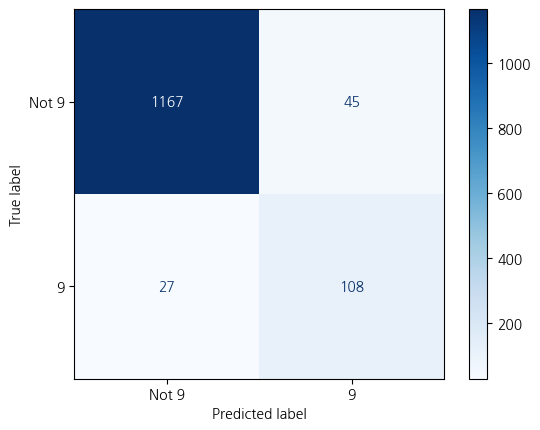

In [166]:
disp = ConfusionMatrixDisplay(tree_result_cm1, # confusion_matrix 계산한 배열)
                            display_labels=['Not 9','9']) # 0,1 의 ticks 라벨을 변경
disp.plot(cmap='Blues')
plt.show()                        

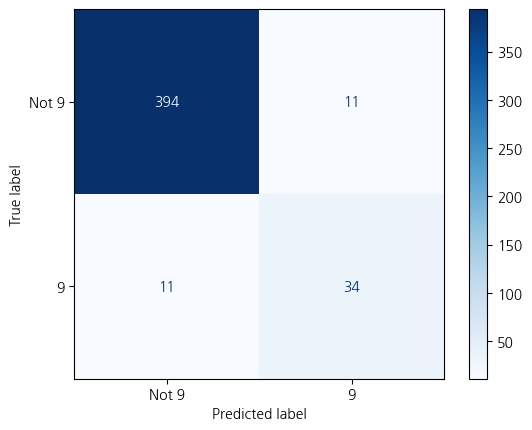

In [167]:
disp = ConfusionMatrixDisplay(tree_result_cm2, # confusion_matrix 계산한 배열)
                            display_labels=['Not 9','9']) # 0,1 의 ticks 라벨을 변경
disp.plot(cmap='Blues')
plt.show()           

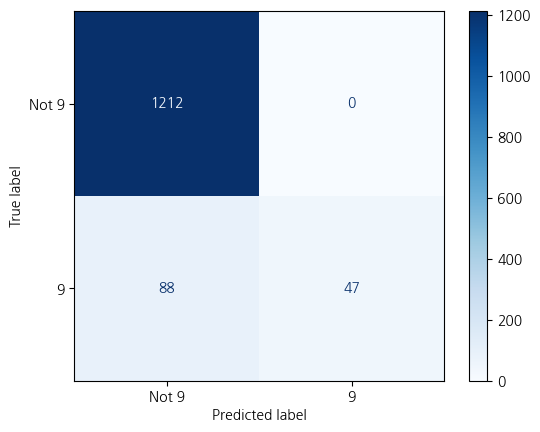

In [168]:
disp = ConfusionMatrixDisplay(forest_result_cm1, # confusion_matrix 계산한 배열)
                            display_labels=['Not 9','9']) # 0,1 의 ticks 라벨을 변경
disp.plot(cmap='Blues')
plt.show()               

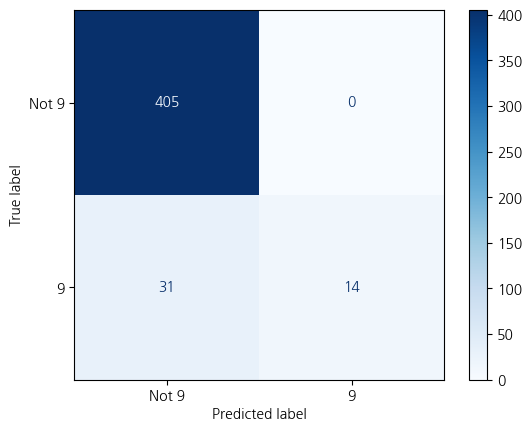

In [169]:
disp = ConfusionMatrixDisplay(forest_result_cm2, # confusion_matrix 계산한 배열)
                            display_labels=['Not 9','9']) # 0,1 의 ticks 라벨을 변경
disp.plot(cmap='Blues')
plt.show()         

In [170]:
print("Accuracy")
accuracy_score(y_train, trees_pred_train), accuracy_score(y_test, trees_pred_test)

Accuracy


(0.9465478841870824, 0.9511111111111111)

In [171]:
print("Recall")
recall_score(y_train, trees_pred_train), recall_score(y_test, trees_pred_test)

Recall


(0.8, 0.7555555555555555)

In [172]:
print("Precision")
precision_score(y_train,trees_pred_train), precision_score(y_test,trees_pred_test)

Precision


(0.7058823529411765, 0.7555555555555555)

In [173]:
print("Accuracy")
accuracy_score(y_train, forest_pred_train), accuracy_score(y_test, forest_pred_test)

Accuracy


(0.9346696362286563, 0.9311111111111111)

In [174]:
print("Recall")
recall_score(y_train, forest_pred_train), recall_score(y_test, forest_pred_test)

Recall


(0.34814814814814815, 0.3111111111111111)

In [175]:
print("Precision")
precision_score(y_train,forest_pred_train), precision_score(y_test,forest_pred_test)

Precision


(1.0, 1.0)

# 강사님이 해주신 것

In [151]:
# 평가 함수들을 제공하는 모듈
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score, accuracy_score,precision_score, f1_score
from metrics import plot_confusion_matrix as pcm, print_metrics_classification as pmc

In [150]:
%%writefile metrics.py
import matplotlib.pyplot as plt
# 평가 함수들을 제공하는 모듈
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score, accuracy_score,precision_score, f1_score


def plot_confusion_matrix(y,pred,title=None):
    """
    confusion matrix를 시각화 하는 함수
    [parameter]
    y:ndarray - wjdekq(ground truth)
    pred: ndarray - 모델이 추정한 값
    title: str - 그래프의 제목(title)
    """
    # 1. confusin maxtrix
    cm= confusion_matrix(y,pred)
    disp=ConfusionMatrixDisplay(cm)
    disp.plot(cmap="Blues")
    if title:
        plt.title(title)
    plt.show()

def print_metrics_classification(y,pred,title=None):
    """
    분류 평가 지표 점수들을 출력하는 함수 
    accuracy, recall, precision, f1score 를 출력
    [parameter]
        y: ndarray - 정딥
        pred: ndarray - 모델 추정값
        title: str- 제목
    """
    if title:
        print(f"==========================={title}=====================================")
    print(f"정확도(Accuracy): {accuracy_score(y,pred)}")
    print(f"재현율(Recall) : {recall_score(y,pred)}")
    print(f"정밀도(Precision): {precision_score(y,pred)}")
    print(f"F1 Score(Precision): {f1_score(y,pred)}")

Writing metrics.py


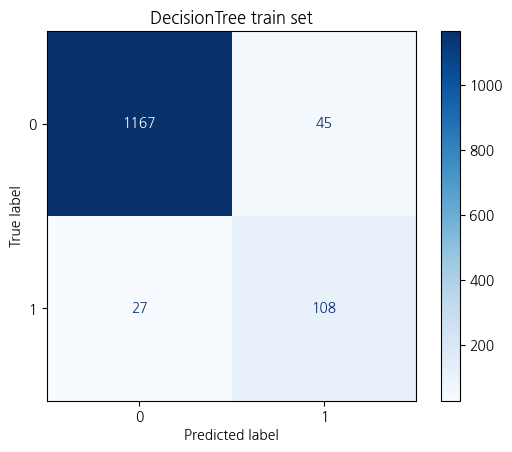

In [145]:
# 1. 모델 생성
tree= DecisionTreeClassifier(max_depth=3, random_state=0)
rfc= RandomForestClassifier(n_estimators=100, max_depth=3, random_state=0)  # decisiontree를 100개를 만들어라 그런의미

# 2. 모델 학습
tree.fit(X_train, y_train)
rfc.fit(X_train, y_train)
# 3. 평가
## 추론
pred_train_tree = tree.predict(X_train)
pred_test_tree= tree.predict(X_test)

pred_train_rfc= rfc.predict(X_train)
pred_test_rfc= rfc.predict(X_test)

plot_confusion_matrix(y_train, pred_train_tree, title="DecisionTree train set")

In [147]:
print_metrics_classification(y_train, pred_train_tree,"DecisionTree Train set 평가")
print_metrics_classification(y_test, pred_test_tree,"DecisionTree Test set 평가")

===========================DecisionTree Train set 평가=====================================
정확도(Accuracy): 0.9465478841870824
재현율(Recall) : 0.8
정밀도(Precision): 0.7058823529411765
F1 Score(Precision): 0.7500000000000001
===========================DecisionTree Test set 평가=====================================
정확도(Accuracy): 0.9511111111111111
재현율(Recall) : 0.7555555555555555
정밀도(Precision): 0.7555555555555555
F1 Score(Precision): 0.7555555555555555


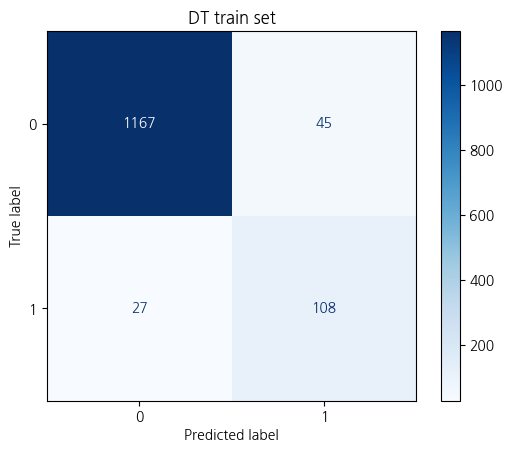

In [152]:
pcm(y_train, pred_train_tree,"DT train set")

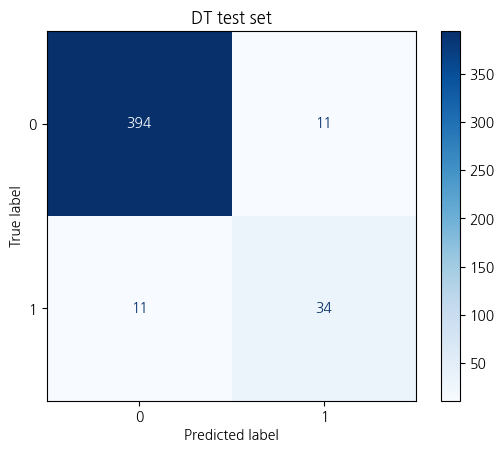

In [153]:
pcm(y_test,pred_test_tree,"DT test set")

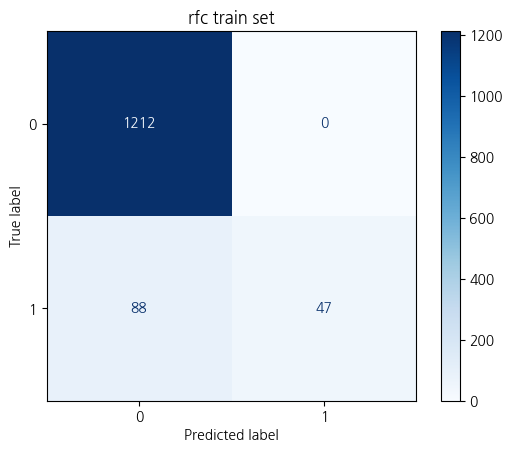

In [158]:
pcm(y_train,pred_train_rfc,"rfc train set")

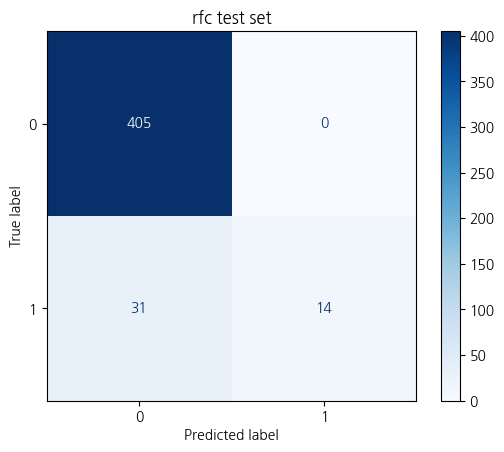

In [159]:
pcm(y_test,pred_test_rfc,"rfc test set")

In [160]:
pmc(y_train, pred_train_tree, "DT train set")
pmc(y_test, pred_test_tree, 'DT Test set')
pmc(y_train, pred_train_rfc, 'RFC train set')
pmc(y_test, pred_test_rfc, 'RFC test set')

===========================DT train set=====================================
정확도(Accuracy): 0.9465478841870824
재현율(Recall) : 0.8
정밀도(Precision): 0.7058823529411765
F1 Score(Precision): 0.7500000000000001
===========================DT Test set=====================================
정확도(Accuracy): 0.9511111111111111
재현율(Recall) : 0.7555555555555555
정밀도(Precision): 0.7555555555555555
F1 Score(Precision): 0.7555555555555555
===========================RFC train set=====================================
정확도(Accuracy): 0.9346696362286563
재현율(Recall) : 0.34814814814814815
정밀도(Precision): 1.0
F1 Score(Precision): 0.5164835164835165
===========================RFC test set=====================================
정확도(Accuracy): 0.9311111111111111
재현율(Recall) : 0.3111111111111111
정밀도(Precision): 1.0
F1 Score(Precision): 0.4745762711864407


### classification_report()
- Accuracy와 각 class가 Positive일 때의 recall, precision, f1-score를 한번에 보여주는 함수

In [157]:
from sklearn.metrics import classification_report
result= classification_report(y_train, pred_train_tree)
print(result)

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1212
           1       0.71      0.80      0.75       135

    accuracy                           0.95      1347
   macro avg       0.84      0.88      0.86      1347
weighted avg       0.95      0.95      0.95      1347



In [ ]:
#               precision    recall  f1-score   support

#            0       0.98      0.96      0.97      1212   # 0을 기준(positive)으로  각 지표
#            1       0.71      0.80      0.75       135   # 1을 기준(positive)으로 했을때 각 지표 

#     accuracy                           0.95      1347
#    macro avg       0.84      0.88      0.86      1347   # 산술평균
# weighted avg       0.95      0.95      0.95      1347   # 0, 1의 비율에 맞춰서 가중평균 


## 재현율과 정밀도의 관계

**이진 분류의 경우 Precision(정밀도)가 중요한 경우와 Recall(재현율) 중요한 업무가 있다.**

### 재현율이 더 중요한 경우
- 실제 Positive 데이터를 Negative 로 잘못 판단하면 업무상 큰 영향이 있는 경우. 
- FN(False Negative)를 낮추는데 촛점을 맞춘다.
- 암환자 판정 모델, 보험사기적발 모델

### 정밀도가 더 중요한 경우
- 실제 Negative 데이터를 Positive 로 잘못 판단하면 업무상 큰 영향이 있는 경우.
- FP(False Positive)를 낮추는데 초점을 맞춘다.
- 스팸메일 판정

In [176]:
tree.predict(X_train[:3]) # 분류 모델의 추론 결과: Label(class)


array([0, 0, 0])

In [177]:
tree.predict_proba(X_train[:3]) # (분류에서만 사용가능)  추론결과:Class별 확률을 반환
# 0, 1

array([[0.99173554, 0.00826446],
       [0.96610169, 0.03389831],
       [0.98695652, 0.01304348]])

In [178]:
rfc.predict_proba(X_train[:3])

array([[0.93277898, 0.06722102],
       [0.57883582, 0.42116418],
       [0.94635172, 0.05364828]])

In [180]:
rfc.predict(X_train[:3])

array([0, 0, 0])

In [185]:
pp=rfc.predict_proba(X_train[:3])[:, 1] # 1 (pos)의 확률
pp

array([0.06722102, 0.42116418, 0.05364828])

In [188]:
np.where(pp>0.5,1,0) # 위에서 predict 의 값이랑 같음 임계점을 0.5.로 둠 

array([0, 0, 0])

In [189]:
np.where(pp>0.3,1,0) # 위에서 predict 의 값이랑 같음  임계점을 0.3로 봄ㅑ.

array([0, 1, 0])

## Positive(1)일 확률에 대한 임계값(Threshold) 변경을 통한 재현율, 정밀도 변환
- **임계값(Threshold)**
    - 모델이 분류 Label을 결정할 때 기준이 되는 확률 기준값.
- 정밀도나 재현율을 특히 강조해야 하는 상황일 경우 임계값 변경을 통해 평가 수치를 올릴 수있다.
- 단 극단적으로 임계점을 올리나가 낮춰서 한쪽의 점수를 높이면 안된다.
    - 예: 환자 여부 예측시 재현율을 너무 높이면 정밀도가 낮아져 걸핏하면 정상인을 환자로 예측하게 된다.
    

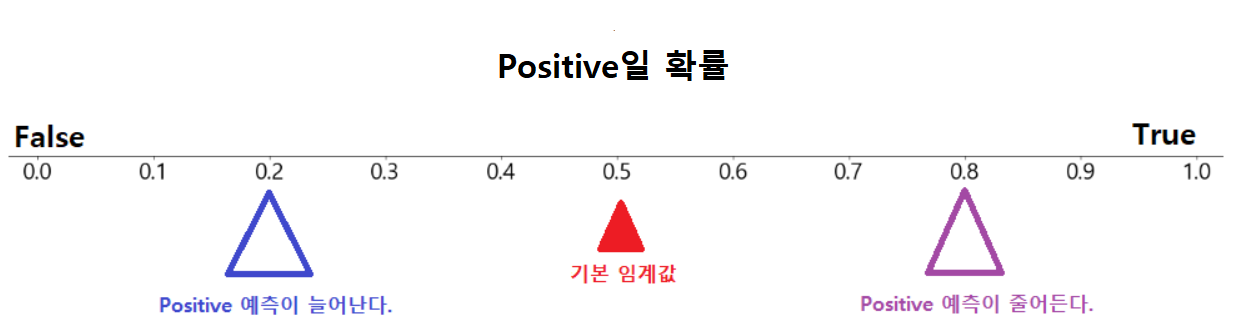

- Positive일 확률이 임계값 이상이면 Positive, 미만이면 Negative로 예측한다.

### 임계값 변경에 따른  정밀도와 재현율 변화관계
- 임계값을 높이면 양성으로 예측하는 기준을 높여서(엄격히 해서) 음성으로 예측되는 샘플이 많아 진다. 그래서 정밀도는 높아지고 재현율은 낮아진다.
- 임계값을 낮추면 양성으로 예측하는 기준이 낮아져서 양성으로 예측되는 샘플이 많아 진다. 그래서 재현율은 높아지고 정밀도는 낮아진다.
- 정리
    - **임계값을 낮추면 재현율은 올라가고 정밀도는 낮아진다.**
    - **임계값을 높이면 재현율은 낮아지고 정밀도는 올라간다.**
- 임계값을 변화시켰을때 **재현율과 정밀도는 반비례 관계를 가진다.**
- 임계값을 변화시켰을때 **재현율과 위양성율(Fall-Out/FPR)은 비례 관계를 가진다.**

### 임계값 변화에 따른 recall, precision 변화

##### 분류 모델의 추론 메소드
- model.predict(X)
    - 추론한 X의 class를 반환
- model.predict_proba(X)
    - 추론한 X의 class별 확률을 반환

##### 임계값 변화에 따른 recall/precision 확인
- **precision_recall_curve(y_정답, positive_예측확률)** 이용
    - 반환값: Tuple - (precision리스트, recall리스트, threshold리스트) 
        - threshold(임계값) 0에서 1까지 변경하며 변화되는 precsion과 recall값을 반환

In [195]:
# 모델이 추론한 positive 의 확률 조회
# DecisoinTree
pos_test_tree= tree.predict_proba(X_test)[:,1]
pos_test_tree.shape

(450,)

In [196]:
pos_test_tree # 1번(positive)인 확률 

array([0.00826446, 0.01304348, 0.01304348, 0.01304348, 0.01304348,
       0.01304348, 0.04      , 0.01304348, 0.01304348, 0.01304348,
       0.01304348, 0.01304348, 0.01304348, 0.75      , 0.03389831,
       0.01304348, 0.01304348, 0.01304348, 0.01304348, 0.14925373,
       0.54545455, 0.01304348, 0.01304348, 0.14925373, 0.01304348,
       0.00826446, 0.01304348, 0.03389831, 0.01304348, 0.01304348,
       0.01304348, 0.04      , 0.01304348, 0.01304348, 0.01304348,
       0.01304348, 0.01304348, 0.01304348, 0.01304348, 0.01304348,
       0.01304348, 0.01304348, 0.75      , 0.01304348, 0.00826446,
       0.75      , 0.01304348, 0.14925373, 0.01304348, 0.75      ,
       0.01304348, 0.01304348, 0.01304348, 0.03389831, 0.01304348,
       0.01304348, 0.01304348, 0.75      , 0.14925373, 0.01304348,
       0.00826446, 0.01304348, 0.01304348, 0.54545455, 0.01304348,
       0.01304348, 0.01304348, 0.00826446, 0.01304348, 0.75      ,
       0.01304348, 0.03389831, 0.75      , 0.01304348, 0.01304

In [217]:
from sklearn.metrics import precision_recall_curve
result= precision_recall_curve(y_test,pos_test_tree) # (정답, positive 확률 )
type(result), len(result)


(tuple, 3)

In [218]:
precision_list, recall_list, thresh_list= result
precision_list.shape, recall_list.shape, thresh_list.shape

((8,), (8,), (7,))

In [222]:
thresh_list=np.append(thresh_ist, 1)

In [223]:
print("idx  prec    recall  thresh")
for idx,(p,r,t) in enumerate(zip(precision_list,recall_list,thresh_list)):
    print(f' {idx}, {p:.4f},  {r:.4f}  {t:.4f}')

idx  prec    recall  thresh
 0, 0.1000,  1.0000  0.0083
 1, 0.1076,  0.9778  0.0130
 2, 0.4318,  0.8444  0.0339
 3, 0.5139,  0.8222  0.0400
 4, 0.5606,  0.8222  0.1493
 5, 0.7556,  0.7556  0.5455
 6, 0.8235,  0.6222  0.7500
 7, 1.0000,  0.0000  1.0000


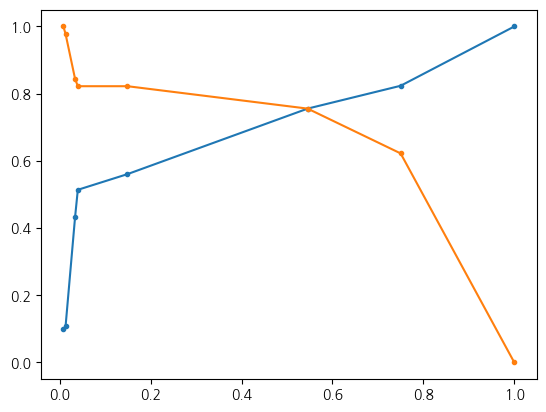

In [224]:
import matplotlib.pyplot as plt
plt.plot(thresh_list,precision_list, marker=".",label="정밀도")
plt.plot(thresh_list,recall_list, marker=".", label="재현율")
plt.show()

In [225]:
from metrics import print_metrics_classification

pred_test = tree.predict(X_test)
print_metrics_classification(y_test, pred_test, title="threshold:05")

===========================threshold:05=====================================
정확도(Accuracy): 0.9511111111111111
재현율(Recall) : 0.7555555555555555
정밀도(Precision): 0.7555555555555555
F1 Score(Precision): 0.7555555555555555


In [226]:
# 임계점을 내리기 
pred_test_01= np.where(pos_test_tree>0.1,1,0)
np.unique(pred_test,return_counts=True), np.unique(pred_test_01,return_counts=True)

((array([0, 1]), array([405,  45], dtype=int64)),
 (array([0, 1]), array([384,  66], dtype=int64)))

In [227]:
print_metrics_classification(y_test, pred_test_01)

정확도(Accuracy): 0.9177777777777778
재현율(Recall) : 0.8222222222222222
정밀도(Precision): 0.5606060606060606
F1 Score(Precision): 0.6666666666666666


In [228]:
# 임계점 올리기 
pred_test_06=np.where(pos_test_tree>0.6,1,0)
np.unique(pred_test_06,return_counts=True)

(array([0, 1]), array([416,  34], dtype=int64))

In [229]:
print_metrics_classification(y_test, pred_test_06)

정확도(Accuracy): 0.9488888888888889
재현율(Recall) : 0.6222222222222222
정밀도(Precision): 0.8235294117647058
F1 Score(Precision): 0.7088607594936709


### 임계값 변경 후처리를 통한 recall/precision 변경 

##### 모델 예측 결과에 적용

## PR Curve(Precision Recall Curve-정밀도 재현율 곡선)와 AP Score(Average Precision Score)
- 이진분류의 평가지표. 
- Positive 확률을 이용해 class(0, 1)을 결정할 때 임계값이 변화에 따른 재현율과 정밀도의 변화를 이용해 모델의 성능을 평가한다. 
    - 재현율이 변화할 때 정밀도가 어떻게 변화하는지 평가한다.
- Precision과 Recall 값들을 이용해 모델을 평가하는 것으로 모델의 Positive에 대한 성능의 강건함(robust)를 평가한다.
- X축에 재현율, Y축에 정밀도를 놓고 임계값이 1 → 0 변화할때 두 값의 변화를 선그래프로 그린다.
- AP Score
    - PR Curve의 성능평가 지표를 하나의 점수(숫자)로 평가한것.
    - PR Curve의 선아래 면적을 계산한 값으로 높을 수록 성능이 우수하다.
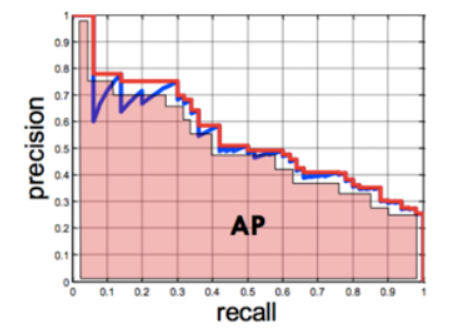   

In [251]:
from sklearn.metrics import (precision_recall_curve,
                                PrecisionRecallDisplay,  # 그래프 보여주는 애
                                average_precision_score) # 면적 구해주는 애

In [252]:
# test set 검증
# 각 모델이 추정한 positive 확률 조회
pos_test_tree=tree.predict_proba(X_test)[:,1]
pos_test_rfc = rfc.predict_proba(X_test)[:,1]

Text(0.5, 1.0, 'DecisionTree Testset PR Curve')

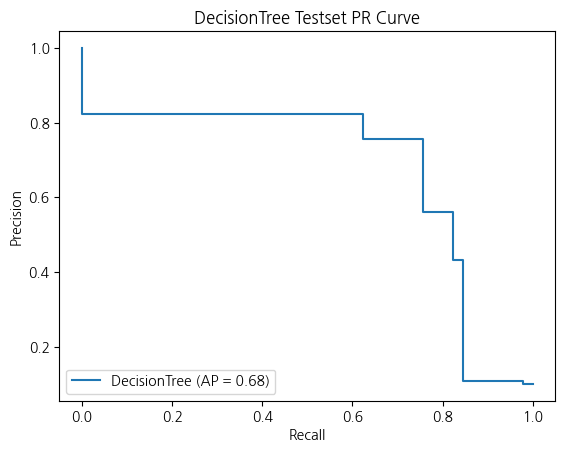

In [256]:
pos_test_tree=tree.predict_proba(X_test)[:,1]
pos_test_rfc = rfc.predict_proba(X_test)[:,1]
# re ccall, precision, threshold 값들조회
precision_list1, recall_list1, thresh1= precision_recall_curve(y_test,pos_test_tree)
disp_tree= PrecisionRecallDisplay(precision_list1,recall_list1,average_precision=ap_score1, estimator_name='DecisionTree')

disp_tree.plot()
plt.title("DecisionTree Testset PR Curve")

In [255]:
ap_score1=average_precision_score(y_test, pos_test_tree) # (y정답 , positive 확률)
ap_score1

0.6766948888666132

Text(0.5, 1.0, 'RandomForest Testset PR Curve')

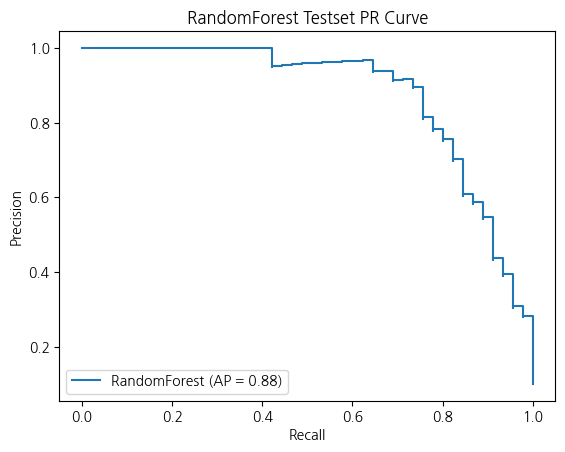

In [257]:
precision_list2, recall_list2, thresh2= precision_recall_curve(y_test,pos_test_rfc)
disp_forest= PrecisionRecallDisplay(precision_list2,recall_list2,average_precision=ap_score, estimator_name='RandomForest')

disp_forest.plot()
plt.title("RandomForest Testset PR Curve")

In [248]:
ap_score=average_precision_score(y_test, pos_test_rfc) # (y정답 , positive 확률)
ap_score

0.8761708259214303

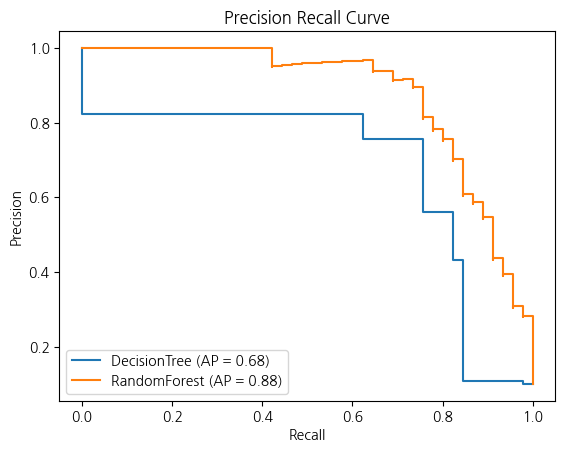

In [259]:
ax=plt.gca()
disp_tree= PrecisionRecallDisplay(precision_list1,recall_list1,average_precision=ap_score1, estimator_name='DecisionTree')
disp_forest= PrecisionRecallDisplay(precision_list2,recall_list2,average_precision=ap_score, estimator_name='RandomForest')
disp_tree.plot(ax=ax)
disp_forest.plot(ax=ax)
plt.title("Precision Recall Curve")
plt.show()

## ROC curve(Receiver Operating Characteristic Curve)와 AUC(Area Under the Curve) score

- **FPR(False Positive Rate-위양성율)**
    - 위양성율 (fall-out)
    - 1-특이도(TNR)
    - 실제 음성중 양성으로 잘못 예측 한 비율
    - 낮을 수록 좋다.
    $$
    \cfrac{FP}{TN+FP}
    $$
- **TPR(True Positive Rate-재현율/민감도)** 
    - 재현율(recall)
    - 실제 양성중 양성으로 맞게 예측한 비율
    - 높을 수록 좋다.
    $$
    \frac{TP}{FN+TP}
    $$
- Positive의 임계값을 변경할 경우 **FPR과 TPR(recall)은 비례해서 변화한다.**
- <b style='font-size:1.3em'>ROC Curve</b>
    - 이진 분류의 성능 평가 지표
    - Positive 확률을 이용해 class(0, 1)을 결정할 때 임계값이 변화에 따른 재현율(TPR)과 위양성율(FPR)의 변화를 이용해 모델의 성능을 평가한다.
        - FPR 변화할 때 TPR이 어떻게 변하는 지를 평가한다.
    - FPR을 X축, TPR을 Y축으로 놓고  놓고 임계값이 1 → 0 변화할때 두 값의 변화를 선그래프로 그린다.
    - Positive(양성), Negative(음성) 에 대한 모델의 성능의 강건함(robust)을 평가한다.

- **AUC Score**
    - ROC Curve의 결과를 점수화(수치화) 하는 함수로 ROC Curve 아래쪽 면적을 계산한다.
    - 0 ~ 1 사이 실수로 나오며 클수록 좋다.
        - AUC Score값이 크려면(1에 가까운 값) 임계값이 클 때 FPR은 작고, TPR의 값은 커야 한다. FPR이 작다는 것은 Negative 잘 분류했다는 것이고 TPR이 크다는 것은 Positive를 잘 분류 했다는 의미이므로 둘에 대한 분류성능이 좋다는 것을 의미한다.
   - **AUC 점수기준**
        - 1.0 ~ 0.9 : 아주 좋음
        - 0.9 ~ 0.8 : 좋음
        - 0.8 ~ 0.7 : 괜찮은 모델
        - 0.7 ~ 0.6 : 의미는 있으나 좋은 모델은 아님
        - 0.6 ~ 0.5 : 좋지 않은 모델

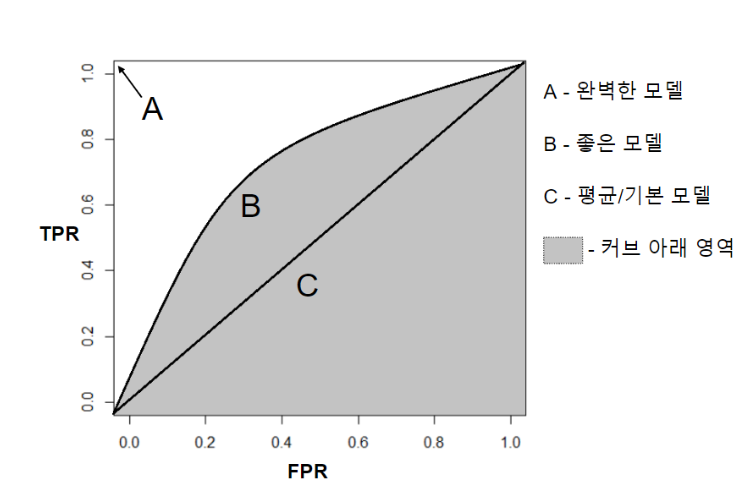

가장 완벽한 것은 FPR이 0이고 TPR이 1인 것이다. 
일반 적으로 FPR이 작을 때 (0에 가까울때) TPR이 높은 경우가 좋은 상황이다. 그래서 선 아래의 면적이 넓은 곡선이 나올 수록 좋은 모델이다.

### ROC, AUC 점수  확인
- roc_curve(y값, Pos_예측확률) : FPR, TPR, Thresholds (임계치)
- roc_auc_score(y값, Pos_예측확률) : AUC 점수 반환

## ROC Curve / Precision_Recall Curve
- **ROC Curve/ROC-AUC score**
    - 이진분류에서 양성클래스 탐지와 음성클래스 탐지의 중요도가 비슷할 때 사용(개고양이 분류)
- **Precision Recall Curve/AP Score**
    - 양성클래스 탐지가 음성클래스 탐지의 중요도보다 높을 경우 사용(암환자 진단)

In [267]:
from sklearn.metrics import roc_curve, RocCurveDisplay, roc_auc_score

import pandas as pd
fpr_list1, tpr_list1, thresh_list1 = roc_curve(y_test,pos_test_tree) # (y정답, pos 확률)
fpr_list1.shape , tpr_list1.shape, thresh_list1.shape

df= pd.DataFrame({"임계값": thresh_list1,
                  "FPR":fpr_list1,
                 "TPR-Recall":tpr_list1})
df

,임계값,FPR,TPR-Recall
0,1.750000,0.000000,0.000000
1,0.750000,0.014815,0.622222
2,0.545455,0.027160,0.755556
3,0.149254,0.071605,0.822222
4,0.040000,0.086420,0.822222
5,0.033898,0.123457,0.844444
6,0.013043,0.901235,0.977778
7,0.008264,1.000000,1.000000


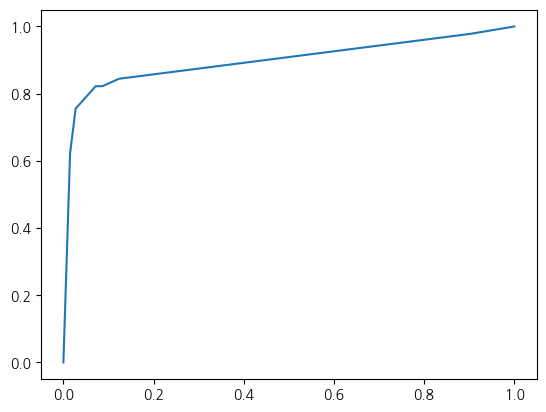

In [269]:
plt.plot(df['FPR'],df['TPR-Recall'])
plt.show()

In [270]:
auc= roc_auc_score(y_test, pos_test_tree)
auc

0.8975308641975308

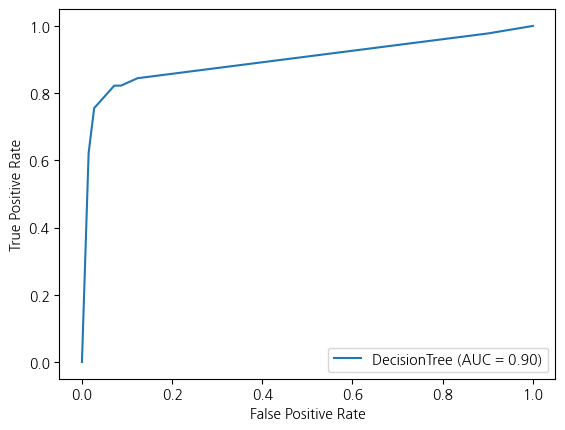

In [273]:
disp_tree= RocCurveDisplay(fpr=fpr_list1, tpr=tpr_list1,roc_auc=auc,estimator_name="DecisionTree")
disp_tree.plot()
plt.show()

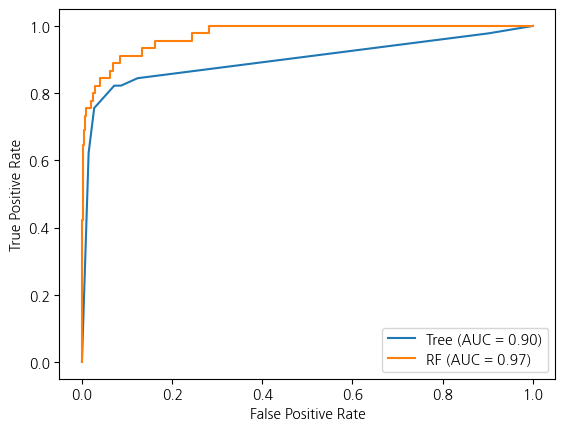

In [278]:
#  decisiontree, random forest 의 roc 커브 시각화
ax = plt.gca()
fpr1, tpr1, _ = roc_curve(y_test,pos_test_tree)
fpr2, tpr2, _ = roc_curve(y_test,pos_test_rfc)
auc_tree= roc_auc_score(y_test, pos_test_tree)
auc_rfc= roc_auc_score(y_test, pos_test_rfc)

disp_tree= RocCurveDisplay(fpr=fpr1,tpr=tpr1, roc_auc=auc_tree, estimator_name="Tree")


disp_rfc= RocCurveDisplay(fpr=fpr2,tpr=tpr2, roc_auc=auc_rfc, estimator_name="RF")
disp_tree.plot(ax=ax)
disp_rfc.plot(ax=ax)
plt.show()

# TODO
- breast_cancer data 모델링
1. breast cancer data 로딩 및 
1. train/test set으로 분리
1. 모델링 (DecisionTreeClassifier(max_depth=3), RandomForestClassifier(max_depth=2, n_estimators=200)
1. 평가 (Train/Test set)
    - 평가지표
        - accuracy, recall, precision, f1 score, confusion matrix
        - PR curve 그리고 AP 점수 확인
        - ROC curve 그리고 AUC 점수확인

In [320]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, RocCurveDisplay, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score, accuracy_score,precision_score, f1_score
from sklearn.model_selection import train_test_split
from metrics import confusion_matrix,print_metrics_classification
import pandas as pd

In [321]:
df=load_breast_cancer()# 로드 

In [322]:
X=df["data"]
y=df['target'] # 데이터 분리 

In [323]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y,test_size=0.25, random_state=0)  # epdlxj qnsfl 

In [324]:
tree=DecisionTreeClassifier(max_depth=3,random_state=0) # tree 모델 생성 
forest=RandomForestClassifier(max_depth=2,n_estimators=200, random_state=0) # forest 모델 생성

In [325]:
tree.fit(X_train,y_train) # 모델 훈련

DecisionTreeClassifier(max_depth=3, random_state=0)

In [326]:
forest.fit(X_train,y_train) # 모델 훈련 

RandomForestClassifier(max_depth=2, n_estimators=200, random_state=0)

In [327]:
tree_predtrain=tree.predict(X_train) # tree예측
tree_predtest=tree.predict(X_test) # tree예측

In [328]:
forest_predtrain=forest.predict(X_train) # tree예측
forest_predtest=forest.predict(X_test) # tree예측

In [329]:
print("*"*50)
print("tree")
print_metrics_classification(y_train,tree_predtrain) # tree train
print("*"*50)
print_metrics_classification(y_test,tree_predtest)
print("*"*50)
print("forest")
print_metrics_classification(y_train,forest_predtrain) # forest train
print("*"*50)
print_metrics_classification(y_test,forest_predtest)

**************************************************
tree
정확도(Accuracy): 0.9765258215962441
재현율(Recall) : 0.9850187265917603
정밀도(Precision): 0.9776951672862454
F1 Score(Precision): 0.9813432835820894
**************************************************
정확도(Accuracy): 0.916083916083916
재현율(Recall) : 0.9222222222222223
정밀도(Precision): 0.9431818181818182
F1 Score(Precision): 0.9325842696629215
**************************************************
forest
정확도(Accuracy): 0.9647887323943662
재현율(Recall) : 0.9737827715355806
정밀도(Precision): 0.9701492537313433
F1 Score(Precision): 0.97196261682243
**************************************************
정확도(Accuracy): 0.9230769230769231
재현율(Recall) : 0.9444444444444444
정밀도(Precision): 0.9340659340659341
F1 Score(Precision): 0.9392265193370165


In [330]:
print(confusion_matrix(y_train,tree_predtrain))
print("*"*50)
print(confusion_matrix(y_test,tree_predtest))
print("*"*50)
print(confusion_matrix(y_train,forest_predtrain))
print("*"*50)
print(confusion_matrix(y_test,forest_predtest))
print("*"*50)

[[153   6]
 [  4 263]]
**************************************************
[[48  5]
 [ 7 83]]
**************************************************
[[151   8]
 [  7 260]]
**************************************************
[[47  6]
 [ 5 85]]
**************************************************


In [331]:
from sklearn.metrics import (precision_recall_curve,
                                PrecisionRecallDisplay,  # 그래프 보여주는 애
                                average_precision_score) # 면적 구해주는 애

In [332]:
pos_testtree=tree.predict_proba(X_test)[:,1]
pos_testforest =forest.predict_proba(X_test)[:,1]
# re ccall, precision, threshold 값들조회

In [333]:
ap_score1=average_precision_score(y_test, pos_testtree) # (y정답 , positive 확률)
ap_score2=average_precision_score(y_test, pos_testforest) # (y정답 , positive 확률)
precision_list1, recall_list1, thresh1= precision_recall_curve(y_test,pos_testtree)
precision_list2, recall_list2, thresh2= precision_recall_curve(y_test,pos_testforest)

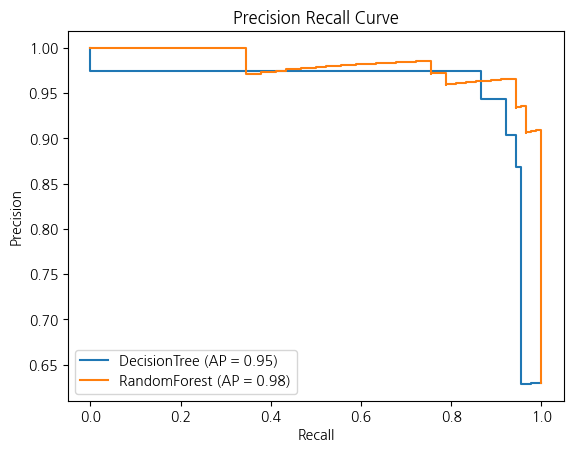

In [334]:
ax=plt.gca()
disp_tree= PrecisionRecallDisplay(precision_list1,recall_list1,average_precision=ap_score1, estimator_name='DecisionTree')
disp_forest= PrecisionRecallDisplay(precision_list2,recall_list2,average_precision=ap_score2, estimator_name='RandomForest')
disp_tree.plot(ax=ax)
disp_forest.plot(ax=ax)
plt.title("Precision Recall Curve")
plt.show()

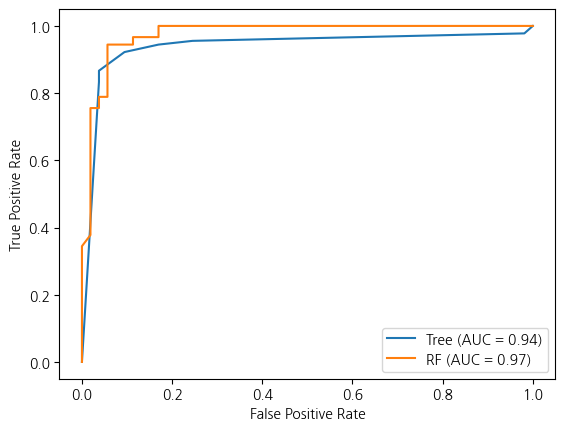

In [335]:
ax = plt.gca()
fpr1, tpr1, _ = roc_curve(y_test,pos_testtree)
fpr2, tpr2, _ = roc_curve(y_test,pos_testforest)
auc_tree= roc_auc_score(y_test, pos_testtree)
auc_rfc= roc_auc_score(y_test, pos_testforest)

disp_tree= RocCurveDisplay(fpr=fpr1,tpr=tpr1, roc_auc=auc_tree, estimator_name="Tree")


disp_rfc= RocCurveDisplay(fpr=fpr2,tpr=tpr2, roc_auc=auc_rfc, estimator_name="RF")
disp_tree.plot(ax=ax)
disp_rfc.plot(ax=ax)
plt.show()

# 강사님이 한 것

In [339]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import (accuracy_score, recall_score,roc_curve, RocCurveDisplay, roc_auc_score, precision_score, f1_score,confusion_matrix,ConfusionMatrixDisplay,
                            precision_recall_curve, PrecisionRecallDisplay,average_precision_score)

In [343]:
# 데이터 로딩 
X, y= load_breast_cancer(return_X_y=True)
# class name
class2name = np.array(['양성','음성'])
# class2name[[0,0,1,1,0]]

array(['양성', '양성', '음성', '음성', '양성'], dtype='<U2')

In [344]:
# Train/test set 분리
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y,test_size=0.2, random_state=0)
X_train.shape, X_test.shape

((455, 30), (114, 30))

In [361]:
# 모델링
## 모델 새성
tree= DecisionTreeClassifier(max_depth=3, random_state=0)
rfc= RandomForestClassifier(max_depth=2, n_estimators=200, random_state=0)
## 학습
tree.fit(X_train,y_train)
rfc.fit(X_train,y_train)
## 검증 
### 추론
pred_test_tree = tree.predict(X_test)
pred_test_rfc=rfc.predict(X_test)
pos_test_tree=tree.predict_proba(X_test)[:,1]
pos_test_rfc=rfc.predict_proba(X_test)[:,1]

In [362]:
### 평가
print("DecisionTree")
accuracy_score(y_test,pred_test_tree),recall_score(y_test,pred_test_tree),precision_score(y_test,pred_test_tree), f1_score(y_test,pred_test_tree)


DecisionTree


(0.9210526315789473,
 0.9305555555555556,
 0.9436619718309859,
 0.9370629370629372)

In [363]:
### 평가
print("Random")
accuracy_score(y_test,pred_test_rfc),recall_score(y_test,pred_test_rfc),precision_score(y_test,pred_test_rfc), f1_score(y_test,pred_test_rfc)


Random


(0.9385964912280702, 0.9444444444444444, 0.9577464788732394, 0.951048951048951)

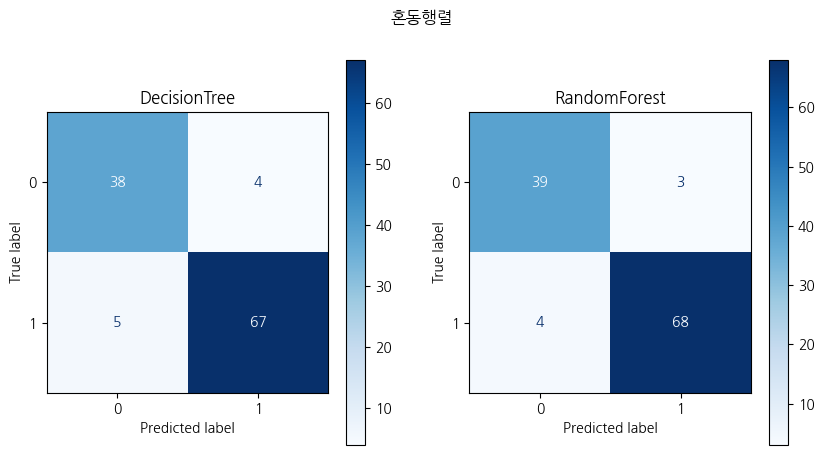

In [364]:
# Confusion Matrix
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
cm1 = confusion_matrix(y_test, pred_test_tree)
cm2 = confusion_matrix(y_test, pred_test_rfc)
disp1 = ConfusionMatrixDisplay(cm1)
disp2 = ConfusionMatrixDisplay(cm2)
disp1.plot(cmap='Blues', ax=ax1)
disp2.plot(cmap='Blues', ax=ax2)
ax1.set_title('DecisionTree')
ax2.set_title('RandomForest')
fig.suptitle("혼동행렬")
plt.show()

In [366]:
# precision recall curve - average precision score (ap score)
ap_tree = average_precision_score(y_test,pos_test_tree)  # (정답, 양성의 확률)
ap_rfc= average_precision_score(y_test,pos_test_rfc) 
ap_tree,ap_rfc

(0.9508563971094506, 0.977122126791544)

AttributeError: module 'matplotlib.pyplot' has no attribute 'showw'

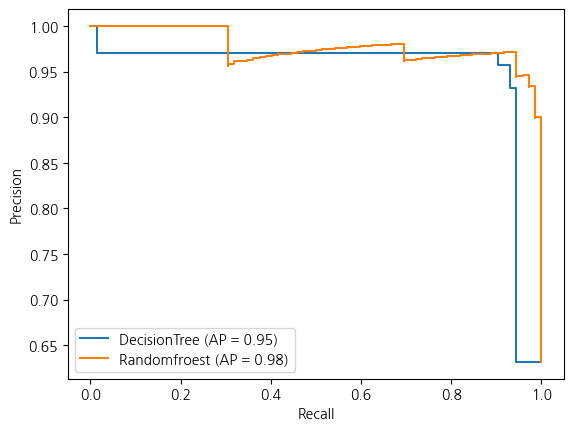

In [370]:
# 시각화
precision1, recall1, _ =precision_recall_curve(y_test,pos_test_tree)
precision2, recall2, _ =precision_recall_curve(y_test,pos_test_rfc)

ax=plt.gca()
PrecisionRecallDisplay(precision1,recall1,average_precision=ap_tree,estimator_name='DecisionTree').plot(ax=ax)
PrecisionRecallDisplay(precision2,recall2,average_precision=ap_rfc,estimator_name='Randomfroest').plot(ax=ax)
plt.showw()

0.9446097883597883 0.9718915343915344


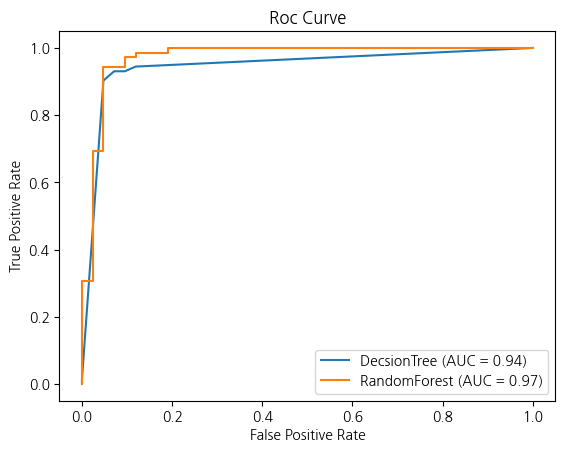

In [373]:
# RocCurve
auc_tree= roc_auc_score(y_test,pos_test_tree)
auc_rfc= roc_auc_score(y_test,pos_test_rfc)
print(auc_tree,auc_rfc)

fpr1, tpr1, _ = roc_curve(y_test,pos_test_tree)
fpr2, tpr2, _ = roc_curve(y_test,pos_test_rfc)

ax=plt.gca()
RocCurveDisplay(fpr=fpr1, tpr=tpr1, roc_auc=auc_tree,
                estimator_name="DecsionTree").plot(ax=ax)
RocCurveDisplay(fpr=fpr2, tpr=tpr2, roc_auc=auc_rfc, 
                estimator_name='RandomForest').plot(ax=ax)
plt.title("Roc Curve")
plt.show()


In [414]:
%%writefile metrics.py
# %load metrics.py
import matplotlib.pyplot as plt
# 평가 함수들을 제공하는 모듈
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay, recall_score, accuracy_score,precision_score,
                             f1_score,average_precision_score,roc_auc_score,precision_recall_curve,PrecisionRecallDisplay)



def plot_roc_curve(y, pos_proba, estimator_name, title=None):
    """
    Roc Curve를 시각화하는 함수
    [parameter]
        y: ndarray - 정답
        pos_proba: ndarray - 모델이 추정한 양성(positive)의 확률
        estimator_name: str - 범례(legend)에 나올 모델이름
    """
    auc_score = roc_auc_score(y, pos_proba)
    fpr, tpr, _ = roc_curve(y, pos_proba)
    RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc_score, 
                    estimator_name=estimator_name).plot()
    if title:
        plt.title(title)
    plt.show()


def plot_precision_recall_curve(y, pos_proba, estimator_name, title=None):
    """
    PrecisionRecall Curve 를 시각화 하는 함수
    [parameter]
    y:ndarray - 정답
    pos_proba:ndarray - 모델이 추정한 양성(positive)의 확률
    estimator_name: str -범례(legend)에 나올 모델 이름
    """
    ap_score = average_precision_score(y,pos_proba)
    precision_list, recall_list,_= precision_recall_curve(y,pos_proba)
    PrecisionRecallDisplay(precision_list, recall_list, average_precision=ap_score, estimator_name=estimator_name).plot()
    if title:
        plt.title(title)
    plt.show()
    

def plot_confusion_matrix(y,pred,title=None):
    """
    confusion matrix를 시각화 하는 함수
    [parameter]
    y:ndarray - wjdekq(ground truth)
    pred: ndarray - 모델이 추정한 값
    title: str - 그래프의 제목(title)
    """
    # 1. confusin maxtrix
    cm= confusion_matrix(y,pred)
    disp=ConfusionMatrixDisplay(cm)
    disp.plot(cmap="Blues")
    if title:
        plt.title(title)
    plt.show()

def print_metrics_classification(y,pred,pos_proba=None,title=None):
    """
    분류 평가 지표 점수들을 출력하는 함수 
    accuracy, recall, precision, f1score
    average precision score ,roc_auc score를 출력
    [parameter]
        y: ndarray - 정딥
        pred: ndarray - 모델 추정값
        pos_probaLndarray - 모델이 추정한positive 의확률 
                            default: None, ap score, auc score는 계산하지 않는다
        title: str- 제목
    """
    if title:
        print(f"==========================={title}=====================================")
    print(f"정확도(Accuracy): {accuracy_score(y,pred)}")
    print(f"재현율(Recall) : {recall_score(y,pred)}")
    print(f"정밀도(Precision): {precision_score(y,pred)}")
    print(f"F1 Score(Precision): {f1_score(y,pred)}")
    if pos_proba is not None:
        print(f"AveragePrecision Score{average_precision_score(y,pos_proba)}")
        print(f"ROC-AUC Sco're:{roc_auc_score(y,pos_proba)} ")


Overwriting metrics.py


In [415]:
print_metrics_classification(y_test,pred_test_tree,pos_test_tree)

정확도(Accuracy): 0.9210526315789473
재현율(Recall) : 0.9305555555555556
정밀도(Precision): 0.9436619718309859
F1 Score(Precision): 0.9370629370629372
AveragePrecision Score0.9508563971094506
ROC-AUC Sco're:0.9446097883597883 


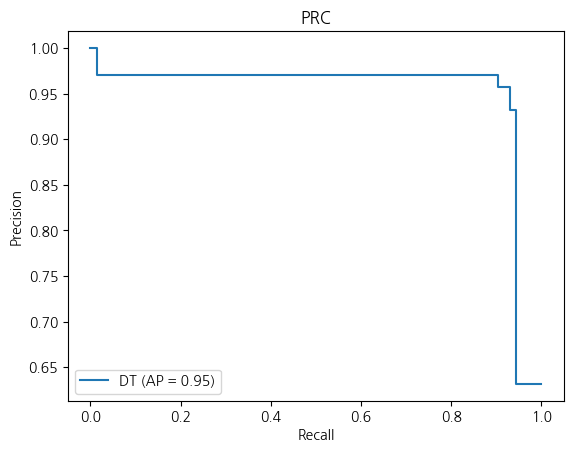

In [416]:
plot_precision_recall_curve(y_test,pos_test_tree,"DT","PRC")

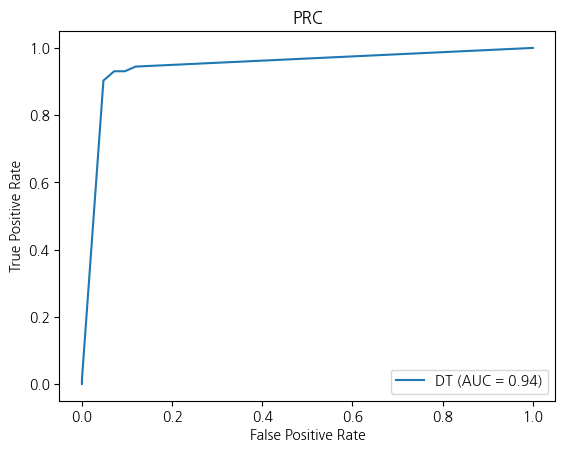

In [417]:
plot_roc_curve(y_test,pos_test_tree,"DT","PRC")

# 회귀(Regression) 평가지표

예측할 값(Target)이 연속형(continuous) 데이터인 지도 학습(Supervised Learning).

## 회귀의 주요 평가 지표

- ### MSE (Mean Squared Error)
    - 실제 값과 예측값의 차를 제곱해 평균 낸 것
    - scikit-learn 평가함수: mean_squared_error() 
    - 교차검증시 지정할 문자열: 'neg_mean_squared_error'
    $$
    MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y_i})^2\\
    y_i: 실제값, \hat{y_i}: 모델이 예측한 값
    $$
    

- ### RMSE (Root Mean Squared Error)
    - MSE는 오차의 제곱한 값이므로 실제 오차의 평균보다 큰 값이 나온다.  MSE의 제곱근이 RMSE이다.
    - mean_squared_error() 의 squared=False로 설정해서 계산. 또는 MSE를 구한 뒤 np.sqrt()로 제곱근을 구한다.
    - 교차검증시 지정할 문자열: 'neg_root_mean_squared_error'
    
    $$
    RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y_i})^2}
    $$
   

- ### $R^2$ (R square, 결정계수)
    - 결정계수는 회귀모델에서 Feature(독립변수)들이 Target(종속변수)를 얼마나 설명하는지를 나타내는 평가지표이다.
        - 평균으로 예측했을 때 오차(총오차) 보다 모델을 사용했을 때 얼마 만큼 더 좋은 성능을 내는지를 비율로 나타낸 값으로 계산한다.
        - 모델은 feature들을 이용해 값을 추론하므로 그 성능은 target에 대한 설명력으로 생각할 수 있다.
    - 1에 가까울 수록 좋은 모델.
    - scikit-learn 평가함수: r2_score()
    - 교차검증시 지정할 문자열: 'r2'
    $$
    R^2 = \cfrac{\sum_{i=1}^{n}(\hat{y_i}-\bar{y})^2}{\sum_{i=1}^{n}(y_i - \bar{y})^2}
    $$

- $y_i$ : i번째 정답 값, 
- $\hat{y_i}$ : i 번째 예측 값, 
- $\bar{y}$ : y의 평균    

## 예제

> #### Dataset 생성 함수
> - make_xxxxx() 함수
>     - 머신러닝 학습을 위한 dummy dataset 구현 함수
>     - 필요한 설정을 직접하여 테스트할 수 있는 데이터셋을 생성해준다.
> - make_regression(): 회귀 문제를 위한 dummy dataset 생성
> - make_classification(): 분류 문제를 위한 dummy dataset 생성

> #### Noise란 
>  같은 Feature를 가진 데이터포인트가 다른 label을 가지는 이유를 Noise(노이즈)라고 한다. 단 그 이유는 현재 상태에선 모른다. 예를 들어 나이란 Feature가 있고 구매량이란 target이 있을때 같은 나이인데 구매량이 다른 경우 그 이유를 우리는 알 수 없다. 그 차이를 만드는 나이 이외의 Feature가 있는데 그것이 수집이 되지 않은 것이다.  그래서 데이터 수집하고 전처리 할 때 그 이유가 되는 Feature를 찾아야 한다. 찾으면 성능이 올라가는 것이고 못찾으면 모르는 이유가 되어 모델 성능이 떨어진다. 

### 데이터셋 생성

### 모델 생성, 학습

### 평가